<a href="https://colab.research.google.com/github/sathamhussain7/ML-algorithms/blob/main/Imbalanced_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imbalanced learning**

**import libraries**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/dataset.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [ ]:
df.shape

(43400, 12)

In [ ]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
df['bmi'] = df["bmi"].fillna(df["bmi"].mean())

In [ ]:
df.smoking_status.unique()

array([nan, 'never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [ ]:
target_count = df.smoking_status.value_counts()
target_count

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [ ]:
df['smoking_status'] = df["smoking_status"].fillna(df["smoking_status"].mode()[0])

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0


In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(43400, 12)

In [ ]:
del df['id']

In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.638023,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.400000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.600000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [ ]:
feature=['avg_glucose_level','bmi']
for i in feature:
 iqr = df[i].quantile(0.75) - df[i].quantile(0.25)
 upper_threshold = df[i].quantile(0.75) + (1.5 * iqr)
 lower_threshold = df[i].quantile(0.25) - (1.5 * iqr)

 print('feature:',i)
 print('iqr :',iqr)
 print('upper_threshold : ',upper_threshold)
 print('lower_threshold :',lower_threshold)
 
 if upper_threshold > df[i].max():
  print('No outlier in upper_threshold ')
 else:
  print('outlier in upper_threshold')
 if lower_threshold< df[i].min():
   print('No outlier in lower_threshold ')
 else:
  print('outlier in lower_threshold')
 print()

feature: avg_glucose_level
iqr : 34.52999999999999
upper_threshold :  163.86499999999998
lower_threshold : 25.745000000000026
outlier in upper_threshold
No outlier in lower_threshold 

feature: bmi
iqr : 9.200000000000003
upper_threshold :  46.400000000000006
lower_threshold : 9.599999999999994
outlier in upper_threshold
No outlier in lower_threshold 



In [ ]:
df.work_type.unique()

array(['children', 'Private', 'Never_worked', 'Self-employed', 'Govt_job'],
      dtype=object)

In [ ]:
df.Residence_type.unique()

array(['Rural', 'Urban'], dtype=object)

In [ ]:
df.smoking_status.unique()

array(['never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [ ]:
df.ever_married.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
count=df.gender.value_counts()
count

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

In [ ]:
df.ever_married=df.ever_married.map({'Yes':0,'No':1})

In [ ]:
df.work_type=df.work_type.map({'children':0, 'Private':4, 'Never_worked':1, 'Self-employed':2, 'Govt_job':3})

In [ ]:
df.smoking_status=df.smoking_status.map({'never smoked':0, 'formerly smoked':1, 'smokes':2})

In [ ]:
df.Residence_type=df.Residence_type.map({'Rural':0, 'Urban':1})

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,1,0,0,95.12,18.0,0,0
1,Male,58.0,1,0,0,4,1,87.96,39.2,0,0
2,Female,8.0,0,0,1,4,1,110.89,17.6,0,0
3,Female,70.0,0,0,0,4,0,69.04,35.9,1,0
4,Male,14.0,0,0,1,1,0,161.28,19.1,0,0


In [ ]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
df.gender=df.gender.map({'Male':0,'Female':1,'Other':2})

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,3.0,0,0,1,0,0,95.12,18.0,0,0
1,0,58.0,1,0,0,4,1,87.96,39.2,0,0
2,1,8.0,0,0,1,4,1,110.89,17.6,0,0
3,1,70.0,0,0,0,4,0,69.04,35.9,1,0
4,0,14.0,0,0,1,1,0,161.28,19.1,0,0


In [ ]:
df.stroke.value_counts()

0    42617
1      783
Name: stroke, dtype: int64

Class 0: 42617
Class 1: 783
Proportion of class 0 is  98.2 %


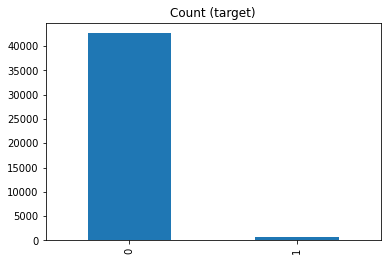

In [ ]:
target_count = df.stroke.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]),2),'%')

target_count.plot(kind='bar', title='Count (target)');

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X=df.drop('stroke',axis='columns')
y=df['stroke']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9650921658986175

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8373  158]
 [ 145    4]]


In [ ]:
roc_auc_score(y_test,y_pred)

0.5041624741664628

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imblearn

In [ ]:
from imblearn.combine import SMOTEENN

In [ ]:
dt1=DecisionTreeClassifier()

In [ ]:
smt=SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X_train, y_train)

In [ ]:
dt1.fit(X_smt, y_smt)

DecisionTreeClassifier()

In [ ]:
y_pred_smt=dt1.predict(X_test)

In [ ]:
roc_auc_score(y_test,y_pred_smt)

0.5584571546802464

In [ ]:
accuracy_score(y_test,y_pred_smt)

0.9097926267281106

In [ ]:
dt1.score(X_test,y_test)

0.9097926267281106

In [ ]:
importance=dt1.feature_importances_

In [ ]:
list(zip(importance,X_test.columns))

[(0.04524573009925342, 'gender'),
 (0.5795244680330073, 'age'),
 (0.006956678082237561, 'hypertension'),
 (0.006931061019305424, 'heart_disease'),
 (0.008105979747458174, 'ever_married'),
 (0.025593248457013967, 'work_type'),
 (0.01703050826814894, 'Residence_type'),
 (0.18125597434810192, 'avg_glucose_level'),
 (0.10897535367411058, 'bmi'),
 (0.020380998271362735, 'smoking_status')]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [ ]:
lr = LogisticRegression()
lr.fit(X_smt,y_smt)
#lr.score(X,y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_lr=lr.predict(X_test)

In [ ]:
roc_auc_score(y_test,y_pred_lr)

0.7023642160962112

In [ ]:
lr.score(X_test,y_test)

0.7519585253456221